# Pipeline Automation

**Introduction to MLRun - a**


Tutorial steps:
- [**Run full workflow with train, optimze & deploy**](#full-workflow)

In [ ]:
%pip install -r requirements.txt

<a id="define-project"></a>
## Define MLRun project and set all mlrun function

You should create, load, or use (get) an **{ref}`MLRun Project <Projects>`** that holds all your functions and assets ([setup.py](./src/setup.py))


In [14]:
from src.setup import create_and_set_project

project = create_and_set_project(name="huggingface-demo")

> 2023-02-15 14:23:36,278 [info] loaded project huggingface-demo from MLRun DB


Names with underscore '_' are about to be deprecated, use dashes '-' instead.Replacing underscores with dashes.


<a id="full-workflow"></a>
## Run full workflow with train, optimze & deploy

You should use `project.set_workflow()` for load your workflow into the project, and when you can run it by using `project.run()` while the param name is key.


In [15]:
# Register the workflow file:
workflow_name = "training_workflow"
project.set_workflow(workflow_name, "src/training_workflow.py")

# Save the project:
project.save()

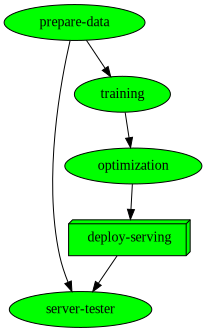

uid,start,state,name,parameters,results
...3c053313,Feb 15 14:35:56,completed,server_tester,label_column=labelsendpoint=http://huggingface-demo-davids-serving-huggingface-demo-davids.default-tenant.app.cto-office.iguazio-cd1.com/,count=100error_count=0avg_latency=60570min_latency=12961max_latency=117076
...9bfb28cd,Feb 15 14:33:03,completed,optimization,model_path=store://artifacts/huggingface-demo-davids/trained_model:42ef4b24-4b35-4e28-834d-846eed65f12e,
...5257b173,Feb 15 14:24:14,completed,training,pretrained_tokenizer=distilbert-base-uncasedpretrained_model=distilbert-base-uncasednum_epochs=1,loss=0.0514learning_rate=0.0eval_loss=0.17555786669254303eval_accuracy=0.93eval_f1=0.8073394495412844eval_runtime=12.3256eval_samples_per_second=24.34eval_steps_per_second=1.542train_runtime=479.4561train_samples_per_second=6.257train_steps_per_second=0.392total_flos=34259380977408.0
...2b2743ba,Feb 15 14:23:48,completed,prepare_data,dataset_name=Shayanvsf/US_Airline_Sentiment,


In [16]:
workflow_run = project.run(
    name=workflow_name,
    arguments={
        "dataset_name": "Shayanvsf/US_Airline_Sentiment",
        "pretrained_tokenizer": "distilbert-base-uncased",
        "pretrained_model": "distilbert-base-uncased",
        "num_epochs": 1
    },
    watch=True,
    dirty=True
)

Here we can see how the workflow looks on our UI & Also the result of the trainer and the server_tester

<img src="./images/workflow.png" alt="workflow" width="1200"/>

<img src="./images/latancy.png" alt="latancy" width="1200"/>

In [17]:
serving_function = project.get_function("serving")

In [18]:
body = "i love flying"
response = serving_function.invoke(path='/predict', body=body)
print(response)

> 2023-02-15 14:36:25,417 [info] invoking function: {'method': 'POST', 'path': 'http://nuclio-huggingface-demo-davids-serving.default-tenant.svc.cluster.local:8080/predict'}
['The sentiment is POSITIVE', 'The prediction score is 0.2689738869667053']


### Gradio front-end

Now after we trained the model and deployed it again you can go to the same gradio page and run over again 

the same sentence(It was Terrible fight) and to see the results.
